# <font color='blue'> PART 1 </font>

### 1.1 Describe your dataset. What analysis will be performed?

<p>  
    The dataset is called "Student_Performance.csv" and contains 3000 rows and 6 columns with the following structures and features:
    
    1. Hours Studied: The number of hours a student dedicates to studying (integer, range: ~2–8).
    2. Previous Scores: The scores obtained in earlier tests or assessments (integer, range: ~45–99).
    3. Extracurricular Activities: Indicates if the student is involved in extracurricular activities (categorical: Yes/No).
    4. Sleep Hours: The number of hours a student sleeps on average per day (integer, range: ~4–9).
    5. Sample Questions Passed: The number of practice or sample questions the student successfully answered (integer, range: ~1–6).
    6. Performance Index: A calculated metric representing the overall performance of the student (integer, range: ~27–91).
    
    
    With this, Regression Analysis will be performed. </p>

In [1]:
# Import for data wrangling and arrays
import pandas as pd
import numpy as np

In [2]:
# Read the CSV file into a DataFrame
reg_df = pd.read_csv('/Users/Marna De Jesus/Desktop/MLA/Student_Performance.csv')

# Display the dataset
reg_df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9,1.0,91
1,4.0,82.0,No,4,2.0,65
2,8.0,51.0,Yes,7,2.0,45
3,5.0,52.0,Yes,5,2.0,36
4,7.0,75.0,No,8,5.0,66
...,...,...,...,...,...,...
2995,2.0,65.0,Yes,8,1.0,43
2996,3.0,88.0,No,9,1.0,67
2997,3.0,84.0,Yes,5,2.0,63
2998,1.0,48.0,Yes,5,3.0,18


### 1.2 Display the training and testing score using noisy data.

In [5]:
# Replace string and null values with numeric data for train test split function to work
reg_df['Hours Studied'] = reg_df['Hours Studied'].replace({np.nan:-1}) # Note: -1 will be a placeholder for null values
reg_df['Extracurricular Activities'] = reg_df['Extracurricular Activities'].replace({'Yes':1, 'No':0}) # Note: Feature Discretization is performed
reg_df['Sleep Hours'] = reg_df['Sleep Hours'].replace({np.nan:-1, '?':-1, 'Six':6, 'Nine':9})
reg_df['Sample Question Papers Practiced'] = reg_df['Sample Question Papers Practiced'].replace({np.nan:-1})

C:\Users\Marna De Jesus\AppData\Local\Temp\ipykernel_16068\3290684616.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  reg_df['Extracurricular Activities'] = reg_df['Extracurricular Activities'].replace({'Yes':1, 'No':0}) # Note: Feature Discretization is performed


In [6]:
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     3000 non-null   float64
 1   Previous Scores                   3000 non-null   float64
 2   Extracurricular Activities        3000 non-null   int64  
 3   Sleep Hours                       3000 non-null   object 
 4   Sample Question Papers Practiced  3000 non-null   float64
 5   Performance Index                 3000 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 140.8+ KB


In [7]:
# Temporarily assign the features and target variable
temp_X = reg_df.drop(['Performance Index'], axis=1) # Features
temp_y = reg_df['Performance Index'] # Target variable

In [8]:
# Import for model validation process
from sklearn.model_selection import train_test_split

In [9]:
# Use the train test split function with temporary features and target variable
temp_X_train, temp_X_test, temp_y_train, temp_y_test = train_test_split(
    temp_X, temp_y, test_size=0.3, train_size=0.7, random_state=0) 

In [10]:
# Import for regressional models and model performance evaluation
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [11]:
# Train the Multiple Linear Regression (MLR) model
temp_mlr = LinearRegression().fit(temp_X_train, temp_y_train)

In [12]:
# Obtain the accuracy scores for train and test set
temp_mlr_train_score = temp_mlr.score(temp_X_train, temp_y_train)
temp_mlr_test_score = temp_mlr.score(temp_X_test, temp_y_test)

# Display the results
print('Accuracy Scores for MLR')
print('Train Score: {:.5f}'.format(temp_mlr_train_score))
print('Test Score: {:.5f}'.format(temp_mlr_test_score))

Accuracy Scores for MLR
Train Score: 0.39273
Test Score: 0.42946


In [13]:
# Train the Ridge Regression model
temp_ridge = Ridge().fit(temp_X_train, temp_y_train)

In [14]:
# Obtain the accuracy scores for train and test set
temp_ridge_train_score = temp_ridge.score(temp_X_train, temp_y_train)
temp_ridge_test_score = temp_ridge.score(temp_X_test, temp_y_test)

# Display the results
print('Accuracy Scores for Ridge Regression')
print('Train Score: {:.5f}'.format(temp_ridge_train_score))
print('Test Score: {:.5f}'.format(temp_ridge_test_score))

Accuracy Scores for Ridge Regression
Train Score: 0.39273
Test Score: 0.42947


### 1.3 Create a function that will check for duplicate rows/records. Duplicate record is not allowed.

In [16]:
# Function for checking whether there are duplicated records in the DataFrame
def check_duplicates(df):
    duplicated_records = df[df.duplicated()]
    if len(duplicated_records) == 0:
        print('No duplicate records were found.')
        return None
    else:
        print(f'{len(duplicated_records)} duplicate records were found.')
        return duplicated_records

In [17]:
# Call the function
check_duplicates(reg_df)

12 duplicate records were found.


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
915,9.0,52.0,0,5,9.0,48
1477,7.0,61.0,1,6,8.0,54
1601,5.0,99.0,0,7,5.0,89
1786,2.0,62.0,1,9,4.0,40
2026,5.0,87.0,1,6,7.0,74
2114,8.0,55.0,0,8,3.0,49
2338,5.0,41.0,0,8,4.0,26
2466,1.0,99.0,0,7,3.0,74
2501,2.0,81.0,0,6,1.0,59
2576,6.0,50.0,0,5,5.0,38


In [18]:
# Drop the rows with duplicated records
reg_df = reg_df.drop([reg_df.index[915], reg_df.index[1477], reg_df.index[1601], reg_df.index[1786], reg_df.index[2026]
                     , reg_df.index[2114], reg_df.index[2338], reg_df.index[2466], reg_df.index[2501], reg_df.index[2576]
                     , reg_df.index[2815], reg_df.index[2960]])

### 1.4.1 Identify and display the location of the noisy data.

In [20]:
# Replace -1 value with null to find noisy data easier
reg_df = reg_df.replace({-1:np.nan})

In [21]:
# Check for incorrect data types
reg_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2988 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     2981 non-null   float64
 1   Previous Scores                   2988 non-null   float64
 2   Extracurricular Activities        2988 non-null   int64  
 3   Sleep Hours                       2985 non-null   object 
 4   Sample Question Papers Practiced  2983 non-null   float64
 5   Performance Index                 2988 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 163.4+ KB


In [22]:
# Check for which columns have null values
reg_df.isnull().sum()

Hours Studied                       7
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         3
Sample Question Papers Practiced    5
Performance Index                   0
dtype: int64

In [23]:
# Check for which indices have null values
reg_df[reg_df.isna().any(axis=1)].index

Index([8, 18, 48, 98, 198, 248, 317, 348, 398, 458, 608, 708, 808, 888, 998], dtype='int64')

In [24]:
# Display unique values of column with seven null values
reg_df['Hours Studied'].unique()

array([ 7.,  4.,  8.,  5.,  3., nan,  6.,  2.,  1.,  9.])

In [25]:
# Display unique values of column with three null values and mixed data types
reg_df['Sleep Hours'].unique()

array(['9', '4', '7', '5', '8', '6', 9, 6, nan], dtype=object)

In [26]:
# Display unique values of column with five null values
reg_df['Sample Question Papers Practiced'].unique()

array([ 1.,  2.,  5.,  6.,  0.,  8.,  3.,  4.,  9.,  7., nan])

### 1.4.2 What are the different types of noise you have identified in the dataset?

<p> The two types of noises found within the dataset are incorrect data types and missing values. </p>

### 1.4.3 Perform necessary imputations to update the incorrect/noisy data.

In [30]:
# Replace string values with numeric data to correct the data type
reg_df['Sleep Hours'] = pd.to_numeric(reg_df['Sleep Hours'], errors='coerce')
reg_df['Sleep Hours'] = reg_df['Sleep Hours'].replace({'9':9, '4':4, '7':7, '5':5, '8':8, '6':6})
reg_df['Sleep Hours'].unique()

array([ 9.,  4.,  7.,  5.,  8.,  6., nan])

In [32]:
# Compute the mean of column Hours Studied
mean_hours_studied = reg_df['Hours Studied'].mean()
print(mean_hours_studied)

4.9533713518953375


In [33]:
# Perform mean imputation on column with seven missing values
reg_df['Hours Studied'] = reg_df['Hours Studied'].fillna(mean_hours_studied)
reg_df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         3
Sample Question Papers Practiced    5
Performance Index                   0
dtype: int64

In [34]:
# Compute the mean of column Sleep Hours
mean_sleep_hours = reg_df['Sleep Hours'].mean()
print(mean_sleep_hours)

6.533333333333333


In [35]:
# Perform mean imputation on column with three missing values
reg_df['Sleep Hours'] = reg_df['Sleep Hours'].fillna(mean_sleep_hours)
reg_df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    5
Performance Index                   0
dtype: int64

In [36]:
# Compute the mean of column Sleep Hours
mean_sample_questions = reg_df['Sample Question Papers Practiced'].mean()
print(mean_sample_questions)

4.542742205833054


In [37]:
# Perform mean imputation on column with five missing values
reg_df['Sample Question Papers Practiced'] = reg_df['Sample Question Papers Practiced'].fillna(mean_sample_questions)
reg_df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

### 1.5 Perform feature discretization on categorical values.

<p> We already performed feature discretization on the column with "Yes" and "No" values in step 1.2 by replacing with 1 and 0 respectively. </p>

### 1.6 Perform feature scaling.

In [43]:
# Import for scaling features to a standard normal distribution
from sklearn.preprocessing import StandardScaler

In [44]:
# Scale the values in the DataFrame
to_scale_study = reg_df[['Hours Studied']] 
to_scale_scores = reg_df[['Previous Scores']]
to_scale_sleep = reg_df[['Sleep Hours']] 
to_scale_questions = reg_df[['Sample Question Papers Practiced']]
to_scale_performance = reg_df[['Performance Index']]

reg_df['Hours Studied'] = StandardScaler().fit_transform(to_scale_study)
reg_df['Previous Scores'] = StandardScaler().fit_transform(to_scale_scores)
reg_df['Sleep Hours'] = StandardScaler().fit_transform(to_scale_sleep)
reg_df['Sample Question Papers Practiced'] = StandardScaler().fit_transform(to_scale_questions)
reg_df['Performance Index'] = StandardScaler().fit_transform(to_scale_performance)

print(reg_df)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0          0.791177         0.885002                           1     1.457271   
1         -0.368550         0.353322                           0    -1.496656   
2          1.177753        -0.616214                           1     0.275700   
3          0.018026        -0.584938                           1    -0.905871   
4          0.791177         0.134394                           0     0.866485   
...             ...              ...                         ...          ...   
2995      -1.141702        -0.178359                           1     0.866485   
2996      -0.755126         0.540974                           0     1.457271   
2997      -0.755126         0.415872                           1    -0.905871   
2998      -1.528278        -0.710040                           1    -0.905871   
2999       0.404601        -0.522388                           0    -0.315086   

      Sample Question Paper

# <font color='blue'> PART 2 </font>

### 2.1 Perform 10-fold cross validation using KFold.

In [49]:
# Assign the features and target variable
X = reg_df.drop(['Performance Index'], axis=1) # Features
y = reg_df['Performance Index'] # Target variable

In [50]:
# Use the train test split function with transformed features and target variable
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, train_size=0.7, random_state=0) 

In [51]:
# Define the MLR model
mlr_model = LinearRegression()

In [52]:
# Import for cross validation and model performance evaluation
from sklearn.model_selection import KFold, cross_val_score

In [53]:
# Evaluate the MLR model using KFold
kf = KFold(n_splits=10, shuffle=True, random_state=65)
mlr_scores = cross_val_score(mlr_model, X, y, cv=kf, scoring='r2')

# Display the results
print('KFold for MLR')
print(f'Cross-validation scores: {mlr_scores}')
print(f'Means cross-validation score: {mlr_scores.mean():.2f}')

KFold for MLR
Cross-validation scores: [ 0.54462733  0.53089079  0.53360928  0.55329068  0.3076462  -0.10951024
  0.54938414  0.56100069 -0.20958807  0.22047761]
Means cross-validation score: 0.35


In [54]:
# Train the Ridge model
ridge_model = Ridge()

In [55]:
# Evaluate the Ridge model using KFold
kf = KFold(n_splits=10, shuffle=True, random_state=65)
ridge_scores = cross_val_score(ridge_model, X, y, cv=kf, scoring='r2')

# Display the results
print('KFold for Ridge')
print(f'Cross-validation scores: {ridge_scores}')
print(f'Means cross-validation score: {ridge_scores.mean():.2f}')

KFold for Ridge
Cross-validation scores: [ 0.54451237  0.53078029  0.53349374  0.55317326  0.30771793 -0.10891827
  0.54927175  0.56087258 -0.20890972  0.22061864]
Means cross-validation score: 0.35


### 2.2 Perform grid search method (of your choice) for hyperparameter tuning. The result of the KFold must be used as the value of the cv parameter of the grid search.

In [57]:
# Import for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [58]:
# Perform hyperparameter tuning on MLR model with GridSearchCV
param_grid = {
    'fit_intercept': [True, False]
}

cv = GridSearchCV(estimator=mlr_model, param_grid=param_grid, cv=kf, n_jobs=1, scoring='r2')
mlr_cv = cv.fit(X_train, y_train)

# Display best parameters and best score
print('Grid Search for MLR')
print("Best Parameters:", mlr_cv.best_params_)
print("Best Cross-Validation Score:", mlr_cv.best_score_)

Grid Search for MLR
Best Parameters: {'fit_intercept': False}
Best Cross-Validation Score: 0.2691571506268233


In [59]:
# Perform hyperparameter tuning on Ridge model with GridSearchCV
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'fit_intercept': [True, False]
}

cv = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=kf, n_jobs=1, scoring='r2')
ridge_cv = cv.fit(X_train, y_train)

# Display best parameters and best score
print('Grid Search for MLR')
print("Best Parameters:", ridge_cv.best_params_)
print("Best Cross-Validation Score:", ridge_cv.best_score_)

Grid Search for MLR
Best Parameters: {'alpha': 100, 'fit_intercept': False}
Best Cross-Validation Score: 0.2861566101067098


### 2.3 Display a tabulated result of the selected hyperparameter(s).

In [61]:
# Store the GridSearchCV results in a dataframe
mlr_cv_df = pd.DataFrame(mlr_cv.cv_results_)

# Display the tabulated result
mlr_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003101,0.004109,0.000282,0.000845,True,{'fit_intercept': True},0.494477,0.491404,0.549221,0.493639,0.564436,0.535661,-0.503655,0.191005,0.493332,-0.618839,0.269068,0.427708,2
1,0.002326,0.003166,0.001315,0.001729,False,{'fit_intercept': False},0.494289,0.489836,0.549696,0.493982,0.563196,0.535595,-0.498941,0.191520,0.492805,-0.620406,0.269157,0.427015,1


In [62]:
# Store the GridSearchCV results in a dataframe
ridge_cv_df = pd.DataFrame(ridge_cv.cv_results_)

# Display the tabulated result
ridge_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002088,0.002791,0.000624,0.001854,0.1,True,"{'alpha': 0.1, 'fit_intercept': True}",0.494464,0.491391,0.549205,0.493626,0.564419,0.535647,-0.503524,0.191021,0.493320,-0.618687,0.269088,0.427647,8
1,0.001573,0.003542,0.002198,0.005109,0.1,False,"{'alpha': 0.1, 'fit_intercept': False}",0.494276,0.489823,0.549679,0.493968,0.563180,0.535580,-0.498811,0.191536,0.492793,-0.620253,0.269177,0.426954,7
2,0.002403,0.003732,0.000000,0.000000,1,True,"{'alpha': 1, 'fit_intercept': True}",0.494345,0.491273,0.549058,0.493503,0.564267,0.535518,-0.502342,0.191163,0.493216,-0.617321,0.269268,0.427095,6
3,0.004696,0.007174,0.000000,0.000000,1,False,"{'alpha': 1, 'fit_intercept': False}",0.494156,0.489708,0.549533,0.493847,0.563030,0.535449,-0.497646,0.191679,0.492690,-0.618882,0.269356,0.426404,5
4,0.003117,0.006234,0.000000,0.000000,10,True,"{'alpha': 10, 'fit_intercept': True}",0.493158,0.490089,0.547592,0.492281,0.562747,0.534229,-0.490657,0.192568,0.492174,-0.603810,0.271037,0.421629,4
5,0.003866,0.005736,0.001360,0.002370,10,False,"{'alpha': 10, 'fit_intercept': False}",0.492961,0.488559,0.548069,0.492634,0.561530,0.534137,-0.486120,0.193096,0.491655,-0.605321,0.271120,0.420959,3
6,0.002410,0.003682,0.000825,0.001777,100,True,"{'alpha': 100, 'fit_intercept': True}",0.481379,0.478293,0.533169,0.480168,0.547795,0.521379,-0.385821,0.204937,0.481723,-0.482128,0.286089,0.372039,2
7,0.001564,0.004693,0.001588,0.003904,100,False,"{'alpha': 100, 'fit_intercept': False}",0.481127,0.477095,0.533672,0.480614,0.546772,0.521136,-0.382465,0.205571,0.481277,-0.483233,0.286157,0.371519,1


### 2.4 Display a feature importance graph.

In [64]:
# Import for creating visualization and plots
import matplotlib.pyplot as plt

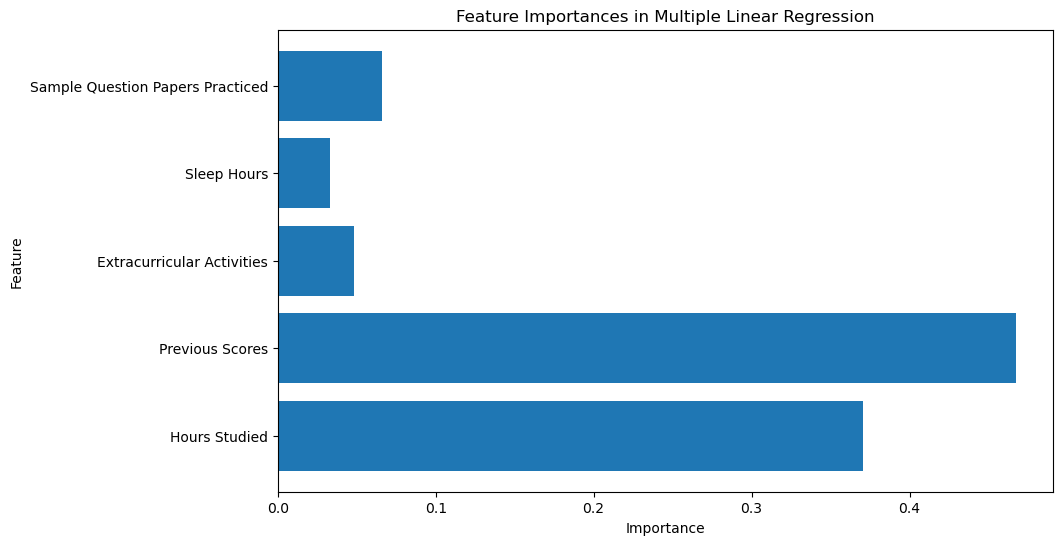

In [65]:
# Extract importances and retrieve respective feature names from MLR model
mlr_importances = LinearRegression().fit(X_train, y_train).coef_
mlr_features = getattr(X_train, 'columns', np.arange(X_train.shape[1]))

# Display feature importance with graph
plt.figure(figsize=(10, 6))
plt.barh(mlr_features, mlr_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Multiple Linear Regression')
plt.show()

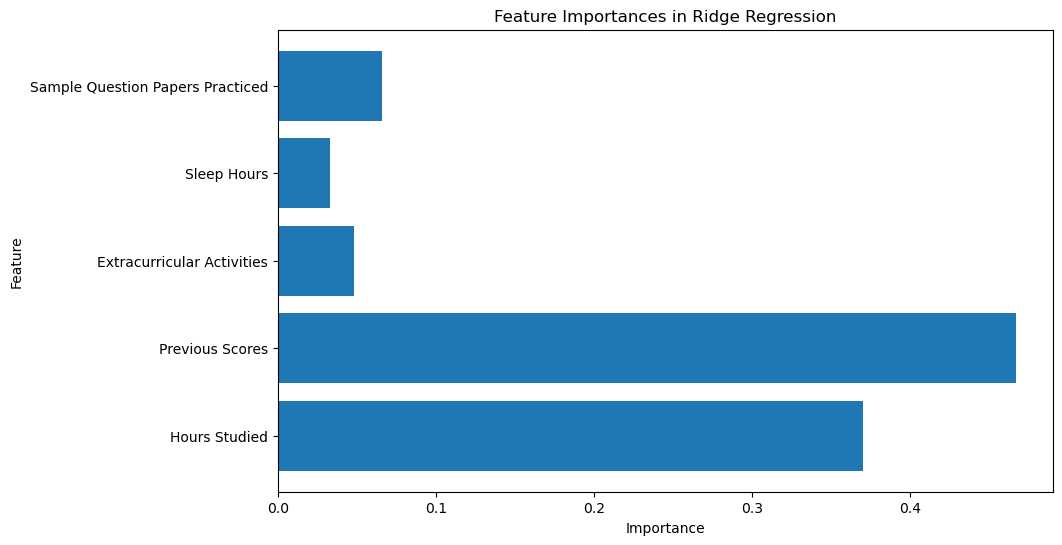

In [66]:
# Extract importances and retrieve respective feature names from Ridge model
ridge_importances = Ridge().fit(X_train, y_train).coef_
ridge_features = getattr(X_train, 'columns', np.arange(X_train.shape[1]))

# Display feature importance with graph
plt.figure(figsize=(10, 6))
plt.barh(ridge_features, ridge_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Ridge Regression')
plt.show()

### 2.5 Perform a feature selection based on the feature importance result.

In [68]:
# Select features with high importance and assign to new variable Features
X_selected = reg_df[['Previous Scores', 'Hours Studied']]
print(X_selected)

      Previous Scores  Hours Studied
0            0.885002       0.791177
1            0.353322      -0.368550
2           -0.616214       1.177753
3           -0.584938       0.018026
4            0.134394       0.791177
...               ...            ...
2995        -0.178359      -1.141702
2996         0.540974      -0.755126
2997         0.415872      -0.755126
2998        -0.710040      -1.528278
2999        -0.522388       0.404601

[2988 rows x 2 columns]


# <font color='blue'> PART 3</font>

### Implement Machine Learning Algorithms with Evaluation Metrics

In [73]:
# Import for evaluating regression model performance
from sklearn.metrics import mean_squared_error

##### Multiple Linear Regression and Ridge Regression (w/o Hyperparameter Tuning and Feature Selection)

In [79]:
# Train the MLR model
mlr = LinearRegression().fit(X_train, y_train)

In [80]:
# Implement MLR model without hyperparameter tuning and feature importance selection

# Predict the target variable for train and test
y_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

# Compute the accuracy score and MSE
train_score = mlr.score(X_train, y_train)
test_score = mlr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

# Display the results
print('Evaluation Metrics for MLR without Hyperparameter Tuning and Feature Importance Selection')
print('Train Score: {:.5f}'.format(train_score))
print('Test Score: {:.5f}'.format(test_score))
print('Mean Squared Error:', round(mse, 5))

Evaluation Metrics for MLR without Hyperparameter Tuning and Feature Importance Selection
Train Score: 0.39009
Test Score: 0.43865
Mean Squared Error: 0.54621


In [82]:
# Train the Ridge model
ridge = Ridge().fit(X_train, y_train)

In [83]:
# Implement Ridge model without hyperparameter tuning and feature importance selection

# Predict the target variable for train and test
y_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Compute the accuracy score and MSE
train_score = ridge.score(X_train, y_train)
test_score = ridge.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

# Display the results
print('Evaluation Metrics for Ridge Regression without Hyperparameter Tuning and Feature Importance Selection')
print('Train Score: {:.5f}'.format(train_score))
print('Test Score: {:.5f}'.format(test_score))
print('Mean Squared Error:', round(mse, 5))

Evaluation Metrics for Ridge Regression without Hyperparameter Tuning and Feature Importance Selection
Train Score: 0.39009
Test Score: 0.43859
Mean Squared Error: 0.54627


##### Multiple Linear Regression and Ridge Regression (w/ Hyperparameter Tuning)

In [85]:
# Implement MLR model with hyperparameter tuning

# Predict the target variable for train and test
y_pred = mlr_cv.predict(X_train)
y_test_pred = mlr_cv.predict(X_test)

# Compute the accuracy score and MSE
train_score = mlr_cv.score(X_train, y_train)
test_score = mlr_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

# Display the results
print('Evaluation Metrics for MLR with Hyperparameter Tuning')
print('Train Score: {:.5f}'.format(train_score))
print('Test Score: {:.5f}'.format(test_score))
print('Mean Squared Error:', round(mse, 5))

Evaluation Metrics for MLR with Hyperparameter Tuning
Train Score: 0.38981
Test Score: 0.43884
Mean Squared Error: 0.54602


In [86]:
# Implement Ridge model with hyperparameter tuning

# Predict the target variable for train and test
y_pred = ridge_cv.predict(X_train)
y_test_pred = ridge_cv.predict(X_test)

# Compute the accuracy score and MSE
train_score = ridge_cv.score(X_train, y_train)
test_score = ridge_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

# Display the results
print('Evaluation Metrics for Ridge Regression with Hyperparameter Tuning')
print('Train Score: {:.5f}'.format(train_score))
print('Test Score: {:.5f}'.format(test_score))
print('Mean Squared Error:', round(mse, 5))

Evaluation Metrics for Ridge Regression with Hyperparameter Tuning
Train Score: 0.38912
Test Score: 0.43234
Mean Squared Error: 0.55234


##### Multiple Linear Regression and Ridge Regression (w/ Feature Importance Selection)

In [91]:
# Use the train test split function with selected important features
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, train_size=0.7, random_state=0) 

In [92]:
# Train the MLR model with selected important features
new_mlr = LinearRegression().fit(X_train, y_train)

In [134]:
# Implement MLR model with feature importance selection

# Predict the target variable for train and test
y_pred = new_mlr.predict(X_train)
y_test_pred = new_mlr.predict(X_test)

# Compute the accuracy score and MSE
train_score = new_mlr.score(X_train, y_train)
test_score = new_mlr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

# Display the results
print('Evaluation Metrics for MLR with Feature Importance Selection')
print('Train Score: {:.5f}'.format(train_score))
print('Test Score: {:.5f}'.format(test_score))
print('Mean Squared Error:', round(mse, 5))

Evaluation Metrics for MLR with Feature Importance Selection
Train Score: 0.38412
Test Score: 0.44236
Mean Squared Error: 0.5426


In [136]:
# Train the MLR model with selected important features
new_ridge = Ridge().fit(X_train, y_train)

In [138]:
# Implement Ridge model with feature importance selection

# Predict the target variable for train and test
y_pred = new_ridge.predict(X_train)
y_test_pred = new_ridge.predict(X_test)

# Compute the accuracy score and MSE
train_score = new_ridge.score(X_train, y_train)
test_score = new_ridge.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

# Display the results
print('Evaluation Metrics for Ridge Regression with Feature Importance Selection')
print('Train Score: {:.5f}'.format(train_score))
print('Test Score: {:.5f}'.format(test_score))
print('Mean Squared Error:', round(mse, 5))

Evaluation Metrics for Ridge Regression with Feature Importance Selection
Train Score: 0.38412
Test Score: 0.44229
Mean Squared Error: 0.54266


##### Multiple Linear Regression and Ridge Regression (w/ Hyperparameter Tuning and Feature Selection)

In [140]:
# Implement MLR model with hyperparameter tuning and feature importance selection

# Perform hyperparameter tuning on MLR model with GridSearchCV
param_grid = {
    'fit_intercept': [True, False]
}

cv = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=kf, n_jobs=1, scoring='r2')
new_mlr_cv = cv.fit(X_train, y_train)

# Predict the target variable for train and test
y_pred = new_mlr_cv.predict(X_train)
y_test_pred = new_mlr_cv.predict(X_test)

# Compute the accuracy score and MSE
train_score = new_mlr_cv.score(X_train, y_train)
test_score = new_mlr_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

# Display the results
print('Evaluation Metrics for MLR with Hyperparameter Tuning and Feature Importance Selection')
print('Train Score: {:.5f}'.format(train_score))
print('Test Score: {:.5f}'.format(test_score))
print('Mean Squared Error:', round(mse, 5))

Evaluation Metrics for MLR with Hyperparameter Tuning and Feature Importance Selection
Train Score: 0.38412
Test Score: 0.44236
Mean Squared Error: 0.5426


In [141]:
# Implement MLR model with hyperparameter tuning and feature importance selection

# Perform hyperparameter tuning on MLR model with GridSearchCV
param_grid = {
    'alpha': [0.1, 1, 10, 100],
    'fit_intercept': [True, False]
}

cv = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=kf, n_jobs=1, scoring='r2')
new_ridge_cv = cv.fit(X_train, y_train)

# Predict the target variable for train and test
y_pred = new_ridge_cv.predict(X_train)
y_test_pred = new_ridge_cv.predict(X_test)

# Compute the accuracy score and MSE
train_score = new_ridge_cv.score(X_train, y_train)
test_score = new_ridge_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_test_pred)

# Display the results
print('Evaluation Metrics for Ridge with Hyperparameter Tuning and Feature Importance Selection')
print('Train Score: {:.5f}'.format(train_score))
print('Test Score: {:.5f}'.format(test_score))
print('Mean Squared Error:', round(mse, 5))

Evaluation Metrics for Ridge with Hyperparameter Tuning and Feature Importance Selection
Train Score: 0.38344
Test Score: 0.43546
Mean Squared Error: 0.54931


### Predicting with New Data

##### Multiple Linear Regression and Ridge Regression (w/o Hyperparameter Tuning and Feature Importance Selection)

In [145]:
# Enter random values to predict
new_data = pd.DataFrame([[6, 88, 0, 7, 5]], columns=X.columns)

# Predict the outcome of the random values
y_new_pred = mlr.predict(new_data)
print("New Data Prediction for MLR:", y_new_pred)

New Data Prediction for MLR: [43.88721506]


In [146]:
# Enter random values to predict
new_data = pd.DataFrame([[5, 90, 1, 4, 9]], columns=X.columns)

# Predict the outcome of the random values
y_new_pred = ridge.predict(new_data)
print("New Data Prediction for Ridge:", y_new_pred)

New Data Prediction for Ridge: [44.64474061]


##### Multiple Linear Regression and Ridge Regression (w/ Hyperparameter Tuning)

In [152]:
# Enter random values to predict
new_data = pd.DataFrame([[8, 80, 0, 6, 8]], columns=X.columns)

# Predict the outcome of the random values
y_new_pred = mlr_cv.predict(new_data)
print("New Data Prediction for MLR with Hyperparameter Tuning:", y_new_pred)

New Data Prediction for MLR with Hyperparameter Tuning: [41.07248618]


In [154]:
# Enter random values to predict
new_data = pd.DataFrame([[4, 82, 1, 9, 9]], columns=X.columns)

# Predict the outcome of the random values
y_new_pred = ridge_cv.predict(new_data)
print("New Data Prediction for Ridge with Hyperparameter Tuning:", y_new_pred)

New Data Prediction for Ridge with Hyperparameter Tuning: [39.07166767]


##### Multiple Linear Regression and Ridge Regression (w/ Feature Importance Selection)

In [157]:
# Enter random values to predict
new_data = pd.DataFrame([[88, 9]], columns=X_selected.columns)

# Predict the outcome of the random values
y_new_pred = new_mlr.predict(new_data)
print("New Data Prediction for MLR with Feature Importance Selection:", y_new_pred)

New Data Prediction for MLR with Feature Importance Selection: [44.51555253]


In [159]:
# Enter random values to predict
new_data = pd.DataFrame([[30, 4]], columns=X_selected.columns)

# Predict the outcome of the random values
y_new_pred = new_ridge.predict(new_data)
print("New Data Prediction for Ridge with Feature Importance Selection:", y_new_pred)

New Data Prediction for Ridge with Feature Importance Selection: [15.51628507]


##### Multiple Linear Regression and Ridge Regression (w/ Hyperparameter Tuning and Feature Importance Selection)

In [162]:
# Enter random values to predict
new_data = pd.DataFrame([[70, 5]], columns=X_selected.columns)

# Predict the outcome of the random values
y_new_pred = new_mlr_cv.predict(new_data)
print("New Data Prediction for MLR with Hyperparameter Tuning and Feature Importance Selection:", y_new_pred)

New Data Prediction for MLR with Hyperparameter Tuning and Feature Importance Selection: [34.60589257]


In [164]:
# Enter random values to predict
new_data = pd.DataFrame([[71, 6]], columns=X_selected.columns)

# Predict the outcome of the random values
y_new_pred = new_ridge_cv.predict(new_data)
print("New Data Prediction for Ridge with Hyperparameter Tuning and Feature Importance Selection:", y_new_pred)

New Data Prediction for Ridge with Hyperparameter Tuning and Feature Importance Selection: [34.00702966]


# <font color='blue'> PART 4</font>

<p> In this project, we employed multiple linear regression (MLR) and Ridge Regression models to predict target outcomes using a dataset with features such as "Previous Scores," "Hours Studied," and others. To evaluate the models, we used a 10-fold cross-validation approach, achieving consistent mean cross-validation scores of 0.35 for both MLR and Ridge. While this suggests the models capture some underlying patterns, the modest score indicates room for improvement, possibly due to limited feature expressiveness or the need for more advanced models.

Hyperparameter tuning via grid search helped optimize the models, identifying 'fit_intercept': False as the best parameter configuration for MLR, with a corresponding best cross-validation score of 0.2862. However, the marginal improvement in performance highlights the limited impact of hyperparameter tuning under the given data and model constraints.

Feature importance analysis revealed that "Previous Scores" and "Hours Studied" are the most predictive features, with scores exceeding 0.4 and 0.3, respectively. This aligns with domain intuition, as prior performance and study habits are critical indicators of success. Conversely, features like "Sample Question Papers Practiced," "Extracurricular Activities," and "Sleep Hours" had lower influence, suggesting diminishing returns from less impactful variables. Ridge Regression mirrored this feature importance pattern, reinforcing the robustness of these findings.

Model performance varied across configurations. Without hyperparameter tuning or feature selection, MLR and Ridge achieved train/test scores of approximately 0.39/0.44 and MSE around 0.546, indicating moderate generalization capability. Feature selection slightly improved test scores, highlighting its effectiveness in simplifying the model while retaining essential information. The combination of hyperparameter tuning and feature selection provided a slight performance boost, with MLR achieving a test score of 0.4424 and MSE of 0.5426.

Prediction results on new data revealed notable differences across configurations. Without hyperparameter tuning or feature selection, MLR and Ridge predicted values of 43.89 and 44.64, respectively. With tuning, predictions dropped to 41.07 and 39.07, reflecting reduced overfitting. Feature selection caused more significant variation, particularly for Ridge, where predictions diverged substantially (15.52). The combined use of hyperparameter tuning and feature selection stabilized predictions, yielding values of 34.61 (MLR) and 34.01 (Ridge). These results suggest that while hyperparameter tuning and feature selection improve consistency, they may also highlight underlying model biases or dataset limitations.

This analysis demonstrates the effectiveness of combining hyperparameter tuning and feature selection in refining model predictions, albeit with incremental gains. The prominence of "Previous Scores" and "Hours Studied" underscores their importance, aligning with educational research that highlights prior preparation as a key success factor. However, the relatively low cross-validation scores (~0.35) and prediction variability indicate that the models may not fully capture the complexity of the problem.

Future work could explore advanced techniques such as non-linear models (e.g., Random Forests or Gradient Boosting) to capture more intricate relationships between features. Increasing the dataset size and diversity could improve generalization. Evaluating alternative feature engineering techniques, such as interaction terms or polynomial transformations, might also enhance predictive accuracy.</p>